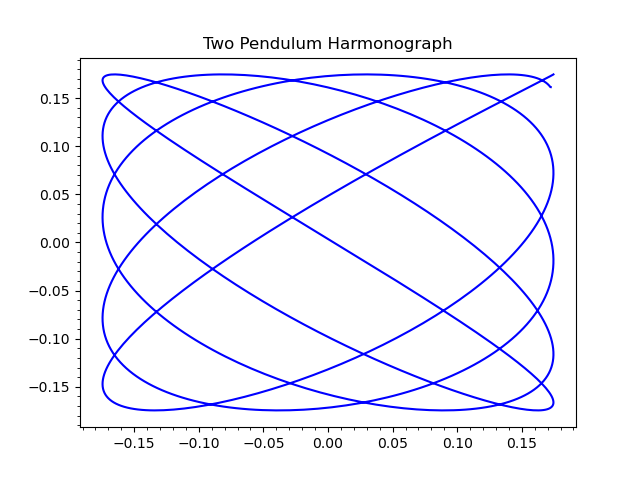

In [1]:
# harmonograph.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp

# Set Initial Conditions
pendulum1_length = 1.0  # meters
theta1_initial = np.radians(10)  # degrees
omega1_initial = 0  # radians/sec

pendulum2_length = 1.5  # meters
theta2_initial = np.radians(10)  # degrees
omega2_initial = 0  # radians/sec


def model(time, state_vector, phase_constant):
    omega, theta = state_vector
    d_omega = -phase_constant * np.sin(theta)
    d_theta = omega
    return d_omega, d_theta


def plot(ax):
    # Precalculate phase constants
    phase1_constant = 9.81 / pendulum1_length
    phase2_constant = 9.81 / pendulum2_length

    # Set model duration (seconds)
    time_initial = 0
    time_final = 10

    # Calculate trajectory of 1st pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega1_initial, theta1_initial],
        max_step=0.01,
        args=[phase1_constant],
    )
    time_steps = sol.t
    omega1, theta1 = sol.y

    # # Calculate trajectory of 2nd pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega2_initial, theta2_initial],
        max_step=0.01,
        args=[phase2_constant],
    )
    omega2, theta2 = sol.y

    # Ensure both vectors are same length
    if len(theta1) > len(theta2):
        theta1 = theta1[: len(theta2)]
    if len(theta2) > len(theta1):
        theta2 = theta2[: len(theta1)]

    ax.plot(theta1, theta2, color="blue", linestyle="solid")

    ax.set_title("Two Pendulum Harmonograph")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_harmonograph():
    plt.close("all")
    fig = plt.figure(label=" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


plot_harmonograph()

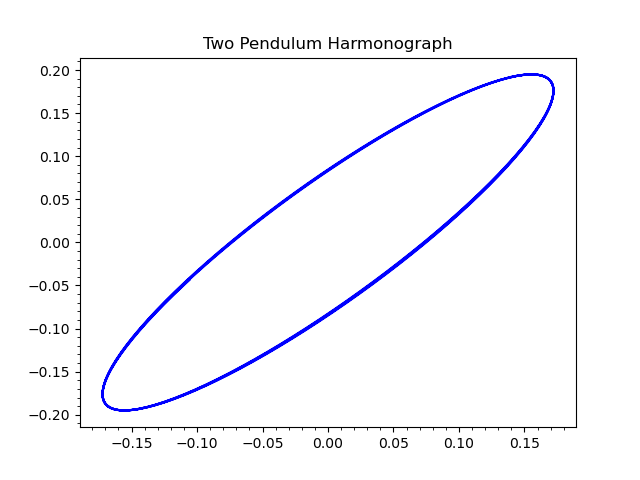

In [38]:
# Cell 2

pendulum1_length = 1.1  # meters
theta1_initial = np.radians(8)  # degrees
omega1_initial = 0.3  # radians/sec

pendulum2_length = 1.1  # meters
theta2_initial = np.radians(11)  # degrees
omega2_initial = 0.1  # radians/sec

plot_harmonograph()